# Projet 6 

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from PIL import Image
import cv2
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns', 35)
pd.set_option('display.max_rows', 1050)

#### Visualisation des catégories

In [2]:
df = pd.read_csv('C:/Users/eliet/Downloads/Dataset+projet+prétraitement+textes+images/Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [3]:
df.shape

(1050, 15)

In [4]:
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


In [5]:
#Traitement des catégories
def split_categories(category, level):
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')
    if(len(cat)) < 3:
        cat = [cat[0], cat[1], 'None']
        if(len(cat))<2:
            cat = [cat[0], 'None', 'None']
    return cat[level]

def split_categories_1(category):
    return split_categories(category,0)
def split_categories_2(category):
    return split_categories(category,1)
def split_categories_3(category):
    return split_categories(category,2)

def detail_categories(dataframe):
    dataframe['cat_lvl_1'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['cat_lvl_2'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['cat_lvl_3'] = dataframe['product_category_tree'].apply(split_categories_3)
    return dataframe.drop(['product_category_tree'], axis=1)

In [6]:
df = detail_categories(df)

<AxesSubplot:ylabel='cat_lvl_1'>

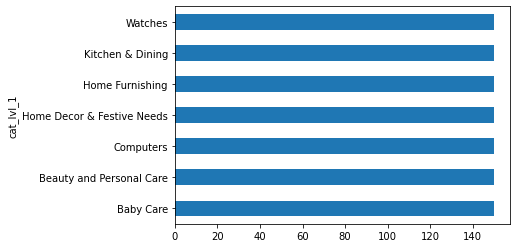

In [7]:
df.groupby('cat_lvl_1').count()['uniq_id'].sort_values(ascending=False).plot.barh()

<AxesSubplot:ylabel='cat_lvl_2'>

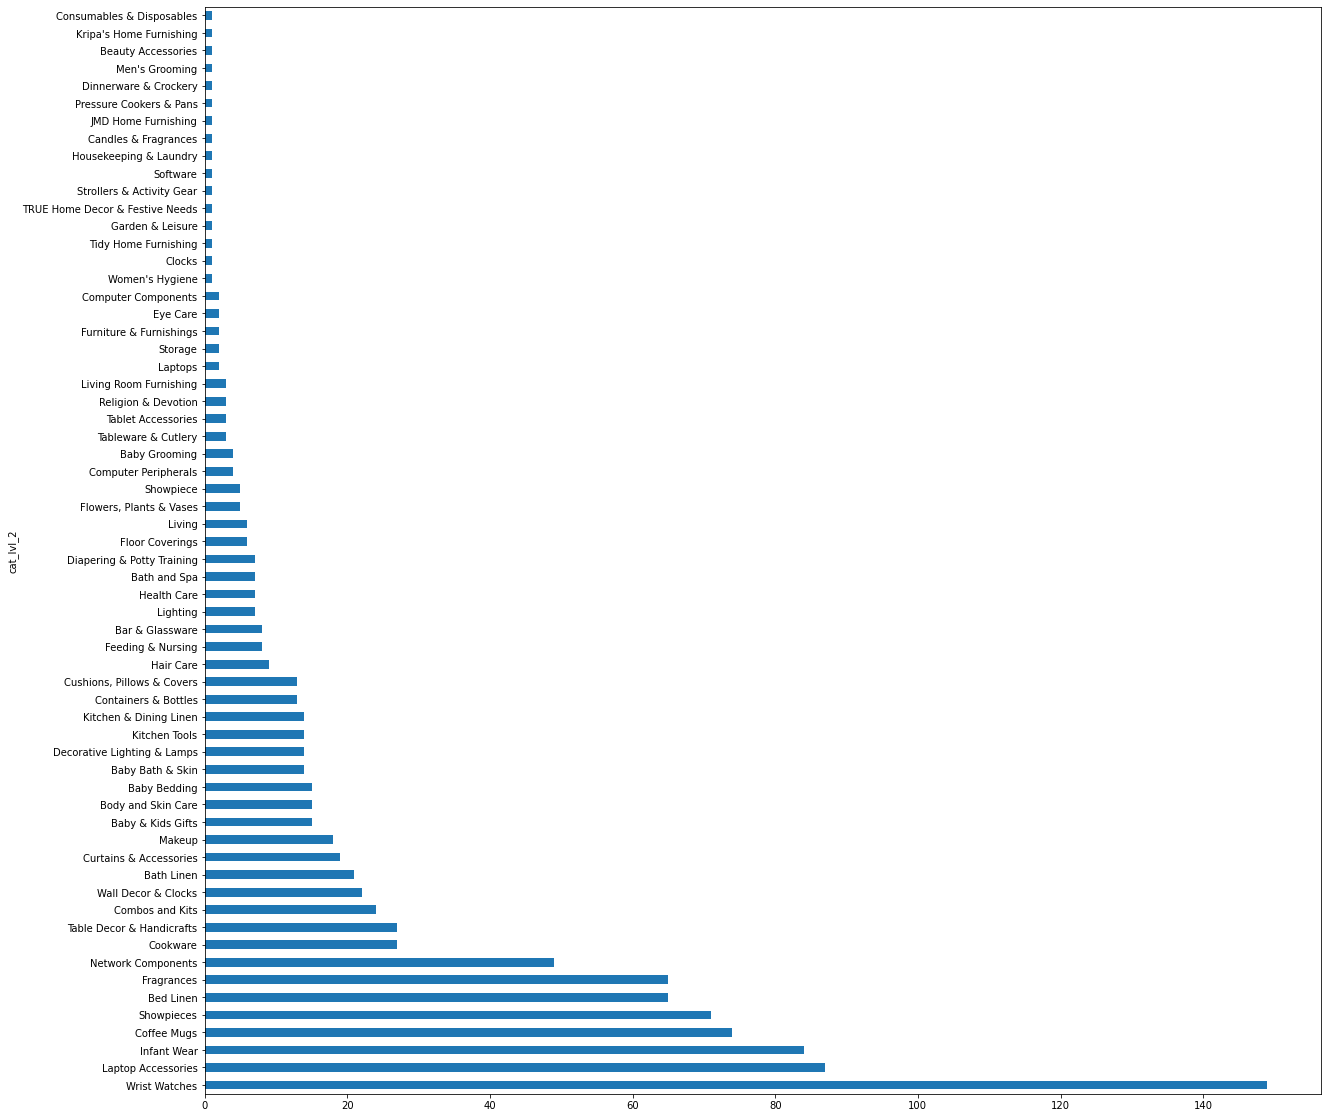

In [8]:
df.groupby('cat_lvl_2').count()['uniq_id'].sort_values(ascending=False).plot.barh(figsize=(20,20))

<AxesSubplot:ylabel='cat_lvl_3'>

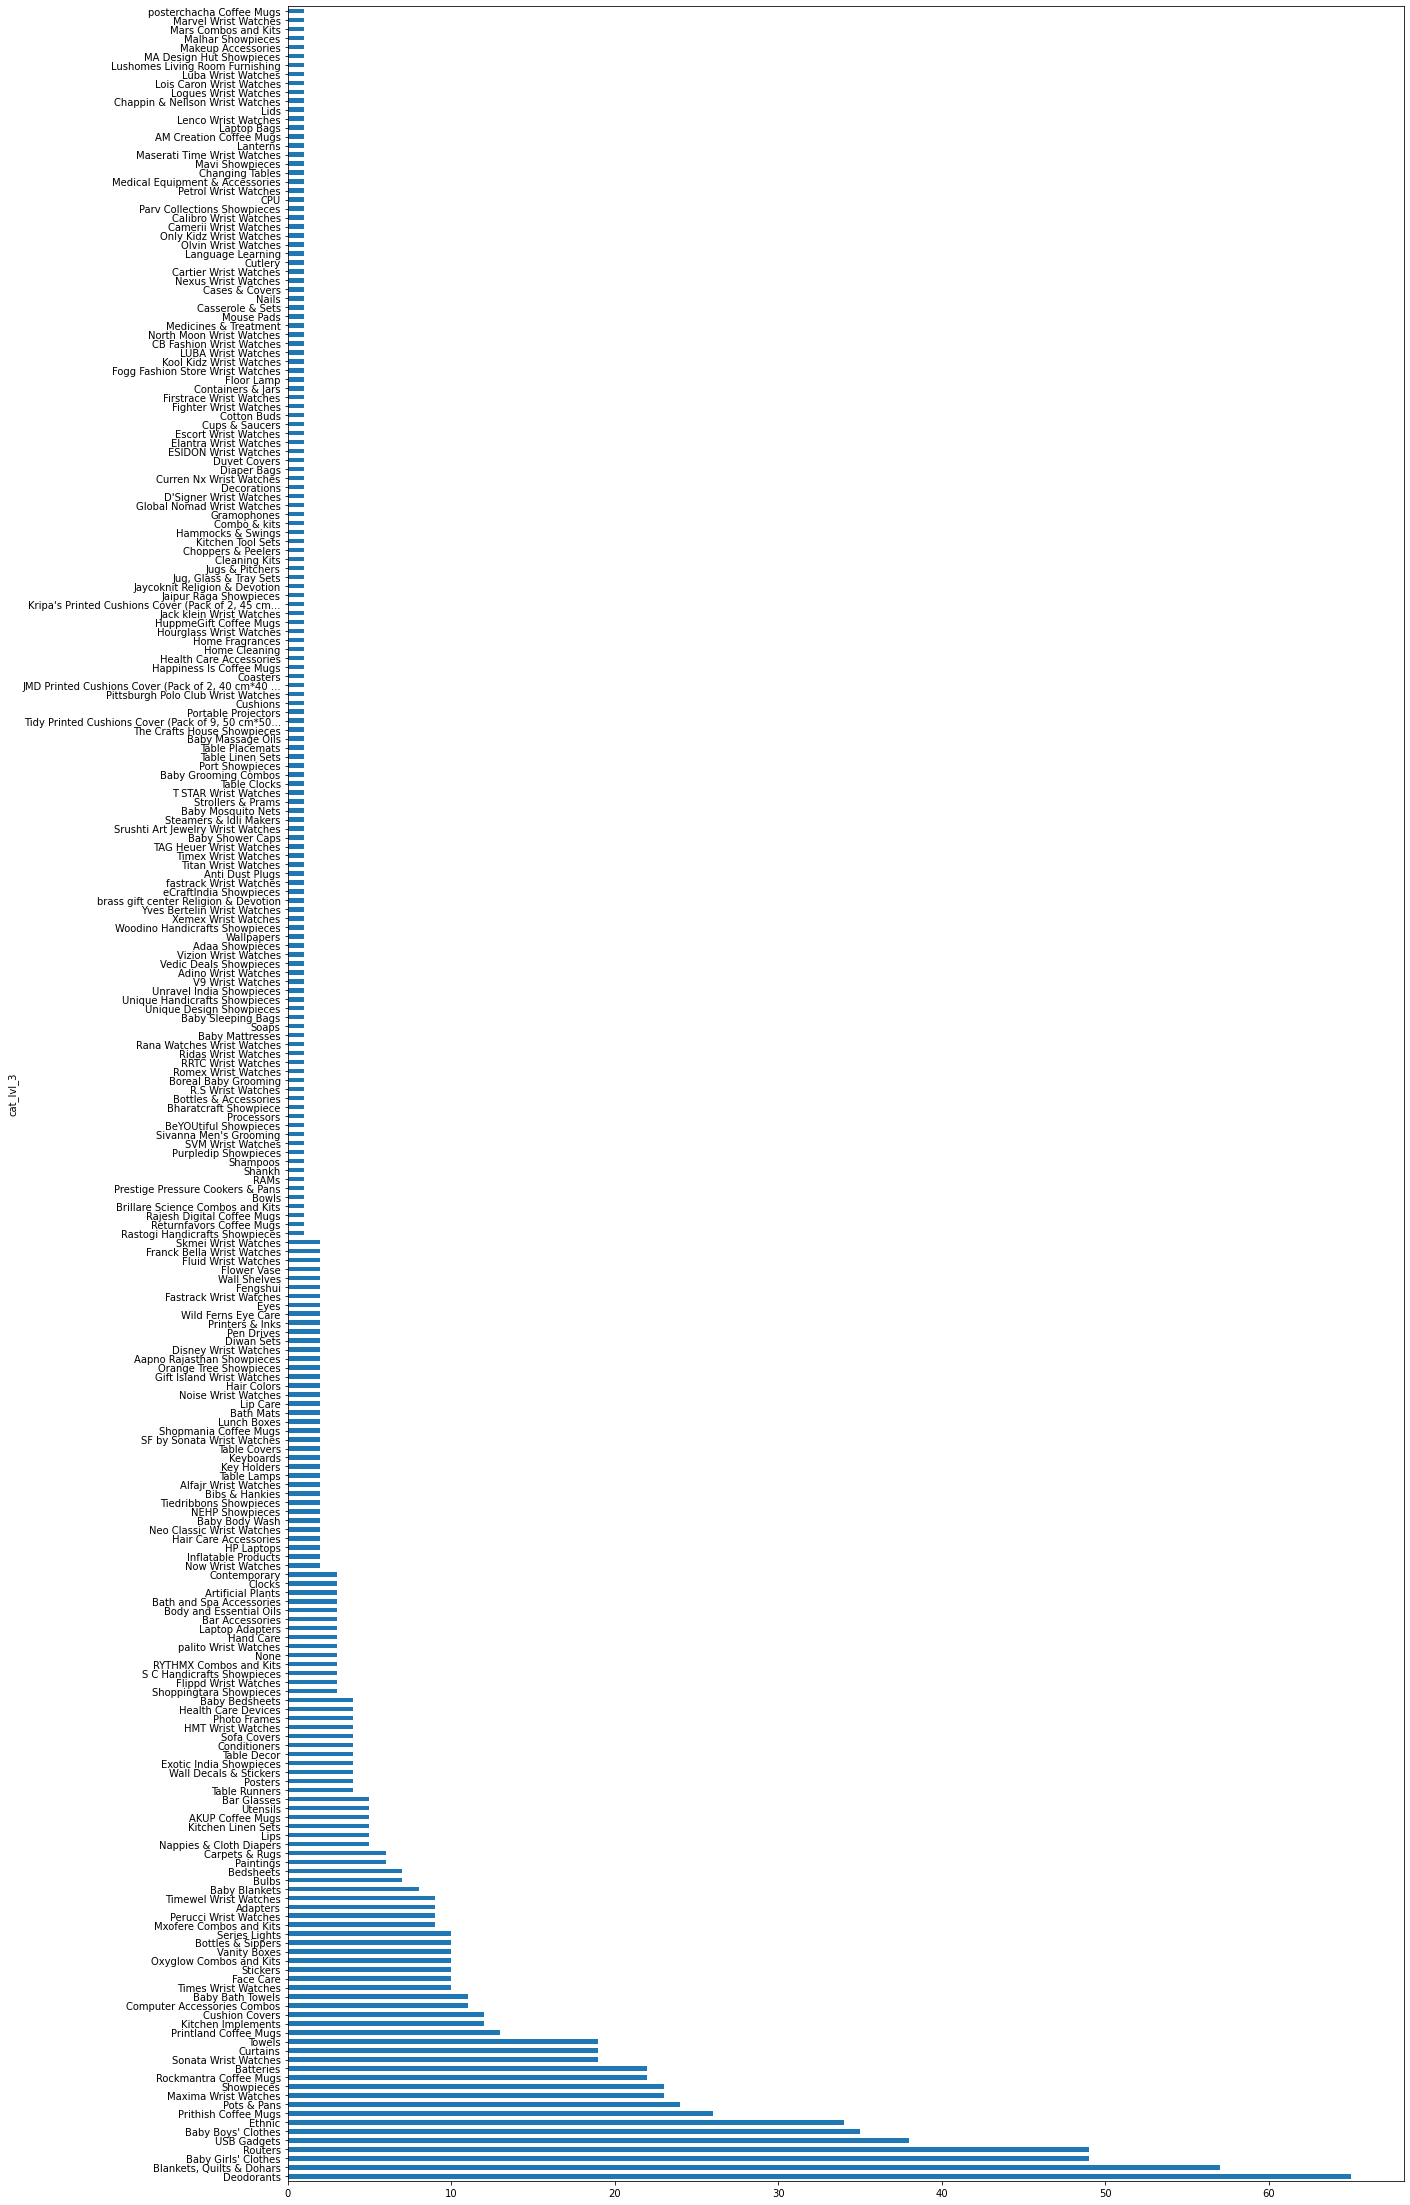

In [9]:
df.groupby('cat_lvl_3').count()['uniq_id'].sort_values(ascending=False).plot.barh(figsize=(20,40))

In [10]:
print (df['image'])

0       55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       7b72c92c2f6c40268628ec5f14c6d590.jpg
2       64d5d4a258243731dc7bbb1eef49ad74.jpg
3       d4684dcdc759dd9cdf41504698d737d8.jpg
4       6325b6870c54cd47be6ebfbffa620ec7.jpg
                        ...                 
1045    958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046    fd6cbcc22efb6b761bd564c28928483c.jpg
1047    5912e037d12774bb73a2048f35a00009.jpg
1048    c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1049    f2f027ad6a6df617c9f125173da71e44.jpg
Name: image, Length: 1050, dtype: object


#### Prétraitement des images

In [11]:
cat_lv1 = df['cat_lvl_1']

In [12]:
le = preprocessing.LabelEncoder()
le.fit(cat_lv1)
cat_1 = le.transform(cat_lv1)

In [13]:
df['caté_1'] = cat_1

#### faire une colonne matrice et une colone matrice en noir et blanc

In [ ]:
scaler = StandardScaler()
matrice = []
matrice_n_b_norm = []
matrice_n_b = []
for col in df['image']:
    img = Images.open(col)
    imgbn = img.convert('L')
    imgnb = img.convert('L')
    img = img.resize((100,100))      #rajouter un backgroup 
    imgbn = imgbn.resize((100,100))
    imgnb = imgnb.resize((100,100))
    img = np.asarray(img)
    imgbn = np.asarray(imgbn)
    imgnb = np.asarray(imgnb)
    imgbn = scaler.fit(imgbn).transform(imgbn)
    matrice_n_b.append(imgnb)
    matrice.append(img)
    matrice_n_b_norm.append(imgbn)

In [ ]:
df['matrice'] = matrice
df['matrice_n_b'] = matrice_n_b
df['matrice_n_b_norm'] = matrice_n_b_norm

In [16]:
df['matrice_n_b'][0]

array([[204, 204, 204, ..., 171, 170, 170],
       [209, 209, 209, ..., 172, 172, 171],
       [210, 210, 210, ..., 173, 173, 173],
       ...,
       [158, 156, 154, ...,  61,  63,  64],
       [153, 151, 150, ...,  59,  60,  62],
       [175, 175, 175, ...,  73,  71,  74]], dtype=uint8)

In [17]:
df.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3,caté_1,matrice,matrice_n_b,matrice_n_b_norm
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,4,"[[[206, 203, 197], [207, 204, 197], [207, 204,...","[[204, 204, 204, 204, 204, 203, 203, 204, 204,...","[[-0.0708890477933701, 0.008482104141458271, 0..."


#### Appliquer les filtres sur la filtre noir et blanc

In [18]:
guauss = []
moy = []
med = []
for col in df['matrice_n_b_norm']:
    gau = cv2.GaussianBlur(col, (5,5),3)
    medi = cv2.medianBlur(col.astype(np.float32),(3),0)
    moye = cv2.blur(col, (3, 3))
    moy.append(moye)
    med.append(medi)
    guauss.append(gau)

In [19]:
df['gaussien'] = guauss
df['moyenne'] = moy
df['medien'] = med

In [20]:
df.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3,caté_1,matrice,matrice_n_b,matrice_n_b_norm,gaussien,moyenne,medien
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,4,"[[[206, 203, 197], [207, 204, 197], [207, 204,...","[[204, 204, 204, 204, 204, 203, 203, 204, 204,...","[[-0.0708890477933701, 0.008482104141458271, 0...","[[0.15580054934743365, 0.17682365519896592, 0....","[[0.09470820512043344, 0.11681522337375869, 0....","[[0.008482104, 0.07937778, 0.17159949, 0.19474..."


Text(0.5, 1.0, 'mediane')

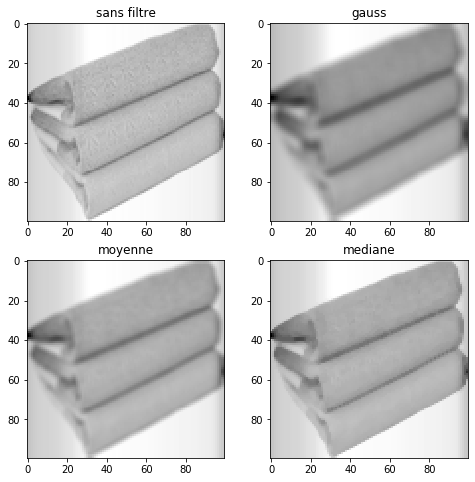

In [113]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.imshow(df['matrice_n_b_norm'][1],cmap='gray') ## paramètre cmap
plt.title("sans filtre")
plt.subplot(222)
plt.imshow(guauss[1],cmap='gray')
plt.title("gauss")
plt.subplot(223)
plt.imshow(moy[1],cmap='gray')
plt.title("moyenne")
plt.subplot(224)
plt.imshow(med[1],cmap='gray')
plt.title("mediane")


#### Transformer les images en vecteur 

In [22]:
df['vecteur_n_b'] = df['matrice_n_b_norm'].apply(lambda i: np.ravel(i))
df['vecteur_gaussien'] = df['gaussien'].apply(lambda i: np.ravel(i))
df['vecteur_moyenne'] = df['moyenne'].apply(lambda i: np.ravel(i))
df['vecteur_medien'] = df['medien'].apply(lambda i: np.ravel(i)) 

In [23]:
df.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3,caté_1,matrice,matrice_n_b,matrice_n_b_norm,gaussien,moyenne,medien,vecteur_n_b,vecteur_gaussien,vecteur_moyenne,vecteur_medien
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,4,"[[[206, 203, 197], [207, 204, 197], [207, 204,...","[[204, 204, 204, 204, 204, 203, 203, 204, 204,...","[[-0.0708890477933701, 0.008482104141458271, 0...","[[0.15580054934743365, 0.17682365519896592, 0....","[[0.09470820512043344, 0.11681522337375869, 0....","[[0.008482104, 0.07937778, 0.17159949, 0.19474...","[-0.0708890477933701, 0.008482104141458271, 0....","[0.15580054934743365, 0.17682365519896592, 0.2...","[0.09470820512043344, 0.11681522337375869, 0.1...","[0.008482104, 0.07937778, 0.17159949, 0.194744..."


In [24]:
df['matrice_n_b_norm'][0].shape

(100, 100)

####  Visualisation PCA et TSNE

In [25]:
X = np.vstack(df['vecteur_n_b'].values)
X_gauss = np.vstack(df['vecteur_gaussien'].values)
X_moy = np.vstack(df['vecteur_moyenne'].values)
X_med = np.vstack(df['vecteur_medien'].values)

In [26]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_projected = pca.transform(X)

In [27]:
pca.fit(X_gauss)
X_projected_gauss = pca.transform(X_gauss)

In [28]:
pca.fit(X_moy)
X_projected_moy = pca.transform(X_moy)

In [29]:
pca.fit(X_med)
X_projected_med = pca.transform(X_med)

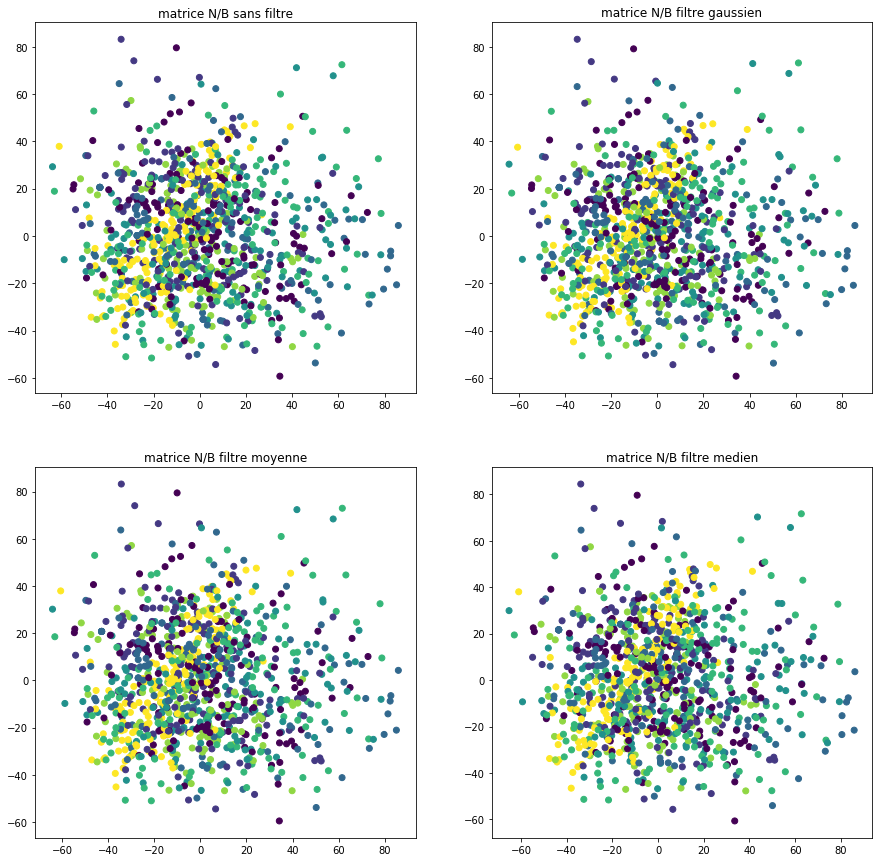

In [30]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("matrice N/B sans filtre")
plt.scatter(X_projected[:,0], X_projected[:,1], c= cat_1)
plt.subplot(222)
plt.title("matrice N/B filtre gaussien")
plt.scatter(X_projected_gauss[:,0], X_projected_gauss[:,1], c= cat_1)
plt.subplot(223)
plt.title("matrice N/B filtre moyenne")
plt.scatter(X_projected_moy[:,0], X_projected_moy[:,1], c= cat_1)
plt.subplot(224)
plt.title("matrice N/B filtre medien")
plt.scatter(X_projected_med[:,0], X_projected_med[:,1], c= cat_1)

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(X)
tsne_obj_gauss= tsne.fit_transform(X_gauss)
tsne_obj_moy= tsne.fit_transform(X_moy)
tsne_obj_med= tsne.fit_transform(X_med)

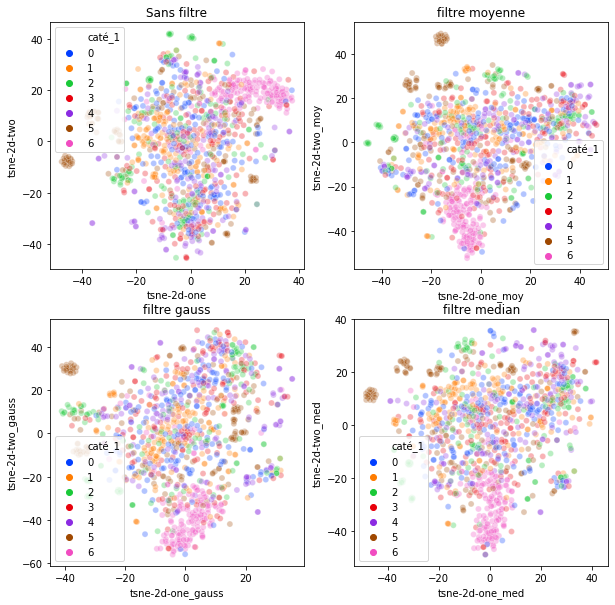

In [32]:
df['tsne-2d-one'] = tsne_obj[:,0]
df['tsne-2d-two'] = tsne_obj[:,1]
df['tsne-2d-one_gauss'] = tsne_obj_gauss[:,0]
df['tsne-2d-two_gauss'] = tsne_obj_gauss[:,1]
df['tsne-2d-one_moy'] = tsne_obj_moy[:,0]
df['tsne-2d-two_moy'] = tsne_obj_moy[:,1]
df['tsne-2d-one_med'] = tsne_obj_med[:,0]
df['tsne-2d-two_med'] = tsne_obj_med[:,1]

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("Sans filtre")
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=df,
    hue = "caté_1",
    legend="full",
    palette="bright",
    alpha=0.3
)
plt.subplot(222)
plt.title("filtre moyenne")
sns.scatterplot(
    x="tsne-2d-one_moy", y="tsne-2d-two_moy",
    data=df,
    hue = "caté_1",
    legend="full",
    palette="bright",
    alpha=0.3
)
plt.subplot(223)
plt.title("filtre gauss")
sns.scatterplot(
    x="tsne-2d-one_gauss", y="tsne-2d-two_gauss",
    data=df,
    hue = "caté_1",
    legend="full",
    palette="bright",
    alpha=0.3
)
plt.subplot(224)
plt.title("filtre median")
sns.scatterplot(
    x="tsne-2d-one_med", y="tsne-2d-two_med",
    data=df,
    hue = "caté_1",
    legend="full",
    palette="bright",
    alpha=0.3
)

#### Kmeans 7 clusters

In [ ]:
from sklearn import preprocessing
X_norm = preprocessing.scale(X)
X_norm_gauss = preprocessing.scale(X_gauss)
X_norm_moy = preprocessing.scale(X_moy)
X_norm_med = preprocessing.scale(X_med)

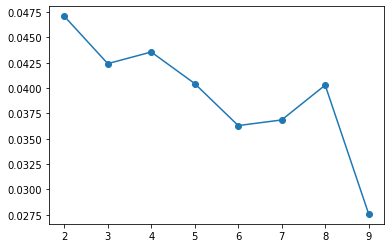

In [34]:
from sklearn import cluster, metrics 

silhouettes = []
for num_clusters in range (2,10):
    cls = cluster.KMeans(n_clusters = num_clusters,random_state=0)
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm,cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2,10),silhouettes,marker='o')

In [35]:
silhouettes

[0.04709098760725679,
 0.04241401996719071,
 0.04356357860078214,
 0.04044569224797041,
 0.036304407979208295,
 0.03685907635915523,
 0.040294568090071314,
 0.02758841338919444]

In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [37]:
def silhouette(model,X):
    print(__doc__)

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.

    pca.fit(X)
    X_pca = pca.transform(X)

    range_n_clusters = [7]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = model(n_clusters=n_clusters, random_state=0)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_projected[:,0], X_projected[:,1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

plt.show()

In [38]:
from sklearn.cluster import KMeans
model = KMeans

Automatically created module for IPython interactive environment
For n_clusters = 7 The average silhouette_score is : 0.03869411004172578


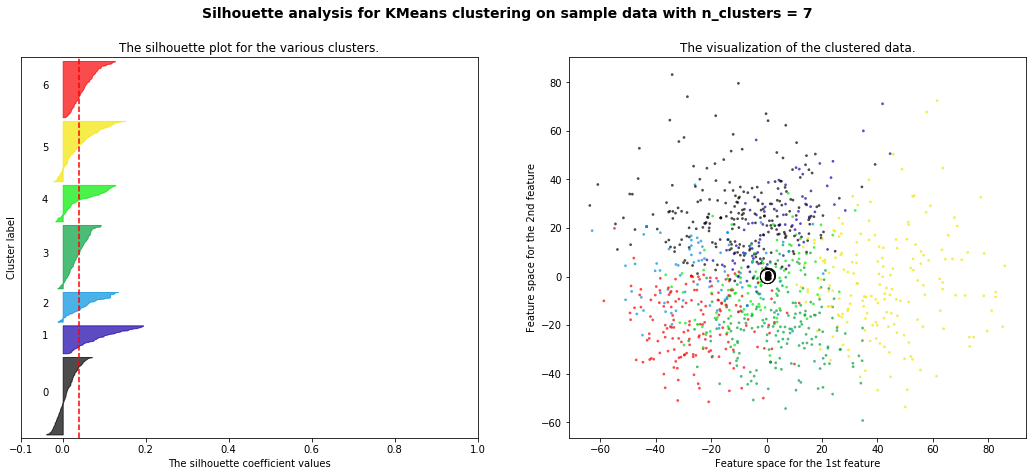

In [39]:
silhouette(model,X)

Automatically created module for IPython interactive environment
For n_clusters = 7 The average silhouette_score is : 0.057193293679198086


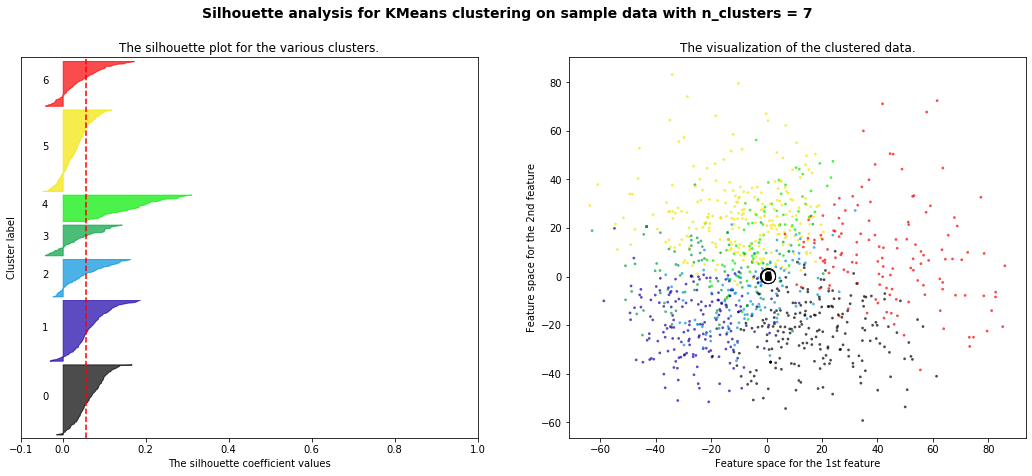

In [40]:
silhouette(model,X_gauss)

Automatically created module for IPython interactive environment
For n_clusters = 7 The average silhouette_score is : 0.046607859038184984


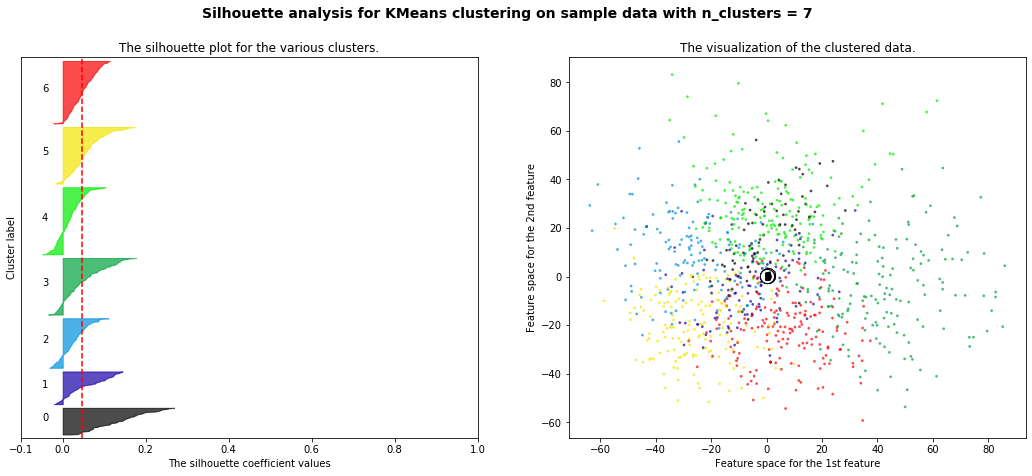

In [41]:
silhouette(model,X_moy)

Automatically created module for IPython interactive environment
For n_clusters = 7 The average silhouette_score is : 0.043854386


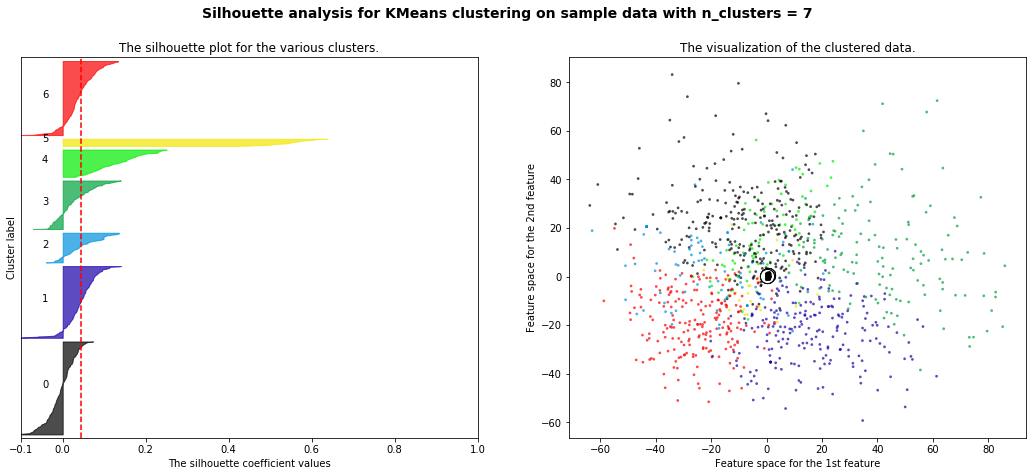

In [42]:
silhouette(model,X_med)

In [43]:
cls7 = cluster.KMeans(n_clusters = 7,random_state=0)
cls7.fit(X_norm)
clusters = cls7.labels_

In [44]:
cls7moy = cluster.KMeans(n_clusters = 7,random_state=0)
cls7moy.fit(X_moy)
clusters_moy = cls7moy.labels_

In [45]:
cls7gauss = cluster.KMeans(n_clusters = 7,random_state=0)
cls7gauss.fit(X_gauss)
clusters_gauss = cls7gauss.labels_

In [46]:
cls7med = cluster.KMeans(n_clusters = 7,random_state=0)
cls7med.fit(X_med)
clusters_med = cls7med.labels_

In [47]:
np.unique(cat_1)

array([0, 1, 2, 3, 4, 5, 6])

In [48]:
# pour bien vérifier la répartition
print(np.count_nonzero(cat_1 == 0))
print(np.count_nonzero(cat_1 == 1))
print(np.count_nonzero(cat_1 == 2))
print(np.count_nonzero(cat_1 == 3))
print(np.count_nonzero(cat_1 == 4))
print(np.count_nonzero(cat_1 == 5))
print(np.count_nonzero(cat_1 == 6))

150
150
150
150
150
150
150


#### Calculer le score ARI

In [49]:
print("le score ARI pour image sans filtre : " ,metrics.adjusted_rand_score(cat_1,clusters))
print("le score ARI pour image filtre gauss : " ,metrics.adjusted_rand_score(cat_1,clusters_gauss))
print("le score ARI pour image filtre moyenne : " ,metrics.adjusted_rand_score(cat_1,clusters_moy))
print("le score ARI pour image filtre mediane : " ,metrics.adjusted_rand_score(cat_1,clusters_med))

le score ARI pour image sans filtre :  0.06733774682962024
le score ARI pour image filtre gauss :  0.06886270442065992
le score ARI pour image filtre moyenne :  0.06592740244584429
le score ARI pour image filtre mediane :  0.06454216874490992


In [50]:
sans_filtre_ari = metrics.adjusted_rand_score(cat_1,clusters)
gauss_ari = metrics.adjusted_rand_score(cat_1,clusters_gauss)
moy_ari = metrics.adjusted_rand_score(cat_1,clusters_moy)
med_ari = metrics.adjusted_rand_score(cat_1,clusters_med)

#### Réduction de dimension 

In [51]:
X.shape

(1050, 10000)

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.8)
ss = StandardScaler()
pca.fit(ss.fit_transform(X))
pca.explained_variance_ratio_.shape

(197,)

In [53]:
pca.fit(ss.fit_transform(X_gauss))
pca.explained_variance_ratio_.shape

(58,)

In [54]:
pca.fit(ss.fit_transform(X_moy))
pca.explained_variance_ratio_.shape

(93,)

In [55]:
pca.fit(ss.fit_transform(X_med))
pca.explained_variance_ratio_.shape

(126,)

In [56]:
sans_filtre_reduit = pca.transform(X)[:,:197]
gauss_reduit = pca.transform(X_gauss)[:,:58]
moy_reduit = pca.transform(X_moy)[:,:93]
med_reduit = pca.transform(X_med)[:,:126]

In [57]:
kmeans_sans_filtre_reduit = KMeans(n_clusters=7, random_state=0).fit(sans_filtre_reduit).predict(sans_filtre_reduit)
kmeans_gauss_reduit = KMeans(n_clusters=7, random_state=0).fit(gauss_reduit).predict(gauss_reduit)
kmeans_moy_reduit = KMeans(n_clusters=7, random_state=0).fit(moy_reduit).predict(moy_reduit)
kmeans_med_reduit = KMeans(n_clusters=7, random_state=0).fit(med_reduit).predict(med_reduit)

In [58]:
print("le score ARI sans filtre réduit : " ,metrics.adjusted_rand_score(cat_1,kmeans_sans_filtre_reduit))
print("le score ARI gauss réduit : " ,metrics.adjusted_rand_score(cat_1,kmeans_gauss_reduit))
print("le score ARI moy réduit : " ,metrics.adjusted_rand_score(cat_1,kmeans_moy_reduit))
print("le score ARI med réduit : " ,metrics.adjusted_rand_score(cat_1,kmeans_med_reduit))

le score ARI sans filtre réduit :  0.06462385273651824
le score ARI gauss réduit :  0.07270924502606008
le score ARI moy réduit :  0.0669004833009286
le score ARI med réduit :  0.07035295741321401


In [59]:
ari_sans_filtre_reduit = metrics.adjusted_rand_score(cat_1,kmeans_sans_filtre_reduit)
ari_gauss_reduit = metrics.adjusted_rand_score(cat_1,kmeans_gauss_reduit)
ari_moy_reduit = metrics.adjusted_rand_score(cat_1,kmeans_moy_reduit)
ari_med_reduit = metrics.adjusted_rand_score(cat_1,kmeans_med_reduit)

In [60]:
resultats_filtre_réduit = [ari_sans_filtre_reduit,ari_gauss_reduit,ari_moy_reduit,
                    ari_med_reduit]
resultats_filtre = [sans_filtre_ari,gauss_ari,moy_ari,med_ari]

In [61]:
index=['sans filtre','gauss','moyenne','mediane']

Text(0.5, 1.0, 'Score ARI')

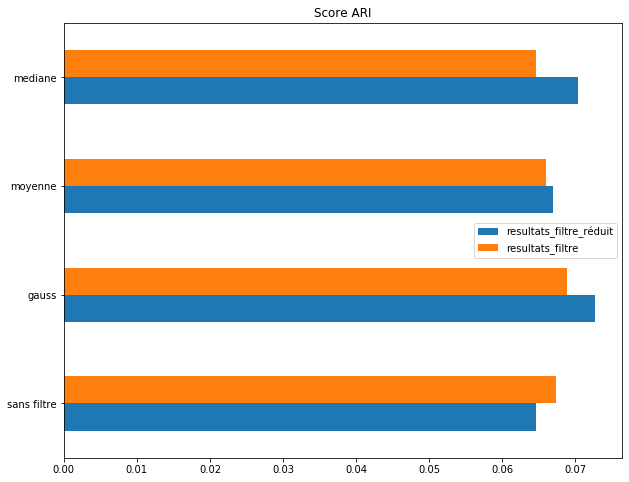

In [62]:
ari_final = pd.DataFrame({'resultats_filtre_réduit': resultats_filtre_réduit,
                   'resultats_filtre': resultats_filtre}, index=index)
ax = ari_final.plot.barh(figsize=(10,8))
plt.title('Score ARI')

#### Bag of visual words

#### SIFT

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 254 255 255]
 [255 255 254 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


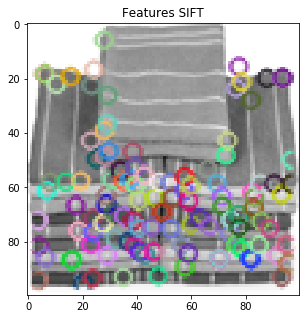

In [63]:
test_sift = df['matrice_n_b'][2]
print(test_sift)
siftt = cv2.xfeatures2d.SIFT_create()
kpp = siftt.detect(test_sift,None)
img_du_sift = cv2.drawKeypoints(test_sift,kpp,test_sift)

plt.figure(figsize=(5,5)) 
plt.title('Features SIFT')
plt.imshow(img_du_sift)

#### Surf

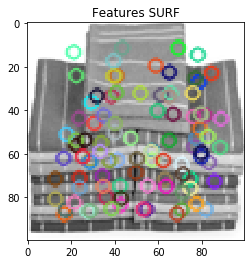

In [64]:
img_surf = df['matrice_n_b'][2]
surf = cv2.xfeatures2d.SURF_create()
kp = surf.detect(img_surf,None)
image_surf = cv2.drawKeypoints(img_surf, kp, outImage = True, flags=2)
plt.title('Features SURF')
plt.imshow(image_surf)

#### ORB

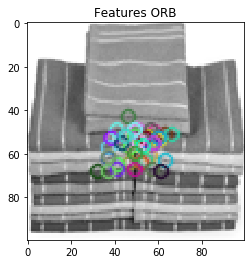

In [65]:
img_orb = df['matrice_n_b'][2]
orb = cv2.ORB_create()

#find keypoints and descriptors
kp, des = orb.detectAndCompute(img_orb, mask = None)
#draw only keypoints location, not size and orientation:
image_orb = cv2.drawKeypoints(img_orb, kp, outImage = True, flags=2)
plt.title('Features ORB')
plt.imshow(image_orb)
plt.show()

#### Avec toutes les images

In [66]:
img_sift_kp = []
img_sift_des = []
for col in df['matrice_n_b']:
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(col,None) 
    img_sift_kp.append(kp)
    img_sift_des.append(des)

In [67]:
img_orb_kp = []
img_orb_des = []
orb = cv2.ORB_create()
for col in df['matrice_n_b']:
    kp, des = orb.detectAndCompute(col, mask = None)
    img_orb_kp.append(kp)
    img_orb_des.append(des)

In [68]:
img_surf_kp = []
img_surf_des = []
surf = cv2.xfeatures2d.SURF_create()
for col in df['matrice_n_b']:
    kp, des = surf.detectAndCompute(col,None)
    img_surf_kp.append(kp)
    img_surf_des.append(des)

In [69]:
len(img_sift_des)

1050

In [70]:
print('Dimension descripteurs élément 0 : ', img_sift_des[0].shape)
print('liste de keypoints élément 0 : ', len(img_sift_kp[0]))

Dimension descripteurs élément 0 :  (84, 128)
liste de keypoints élément 0 :  84


In [71]:
print('Dimension descripteurs élément 1 : ', img_orb_des[1].shape)
print('liste de keypoints élément 1 : ', len(img_orb_kp[1]))

Dimension descripteurs élément 1 :  (17, 32)
liste de keypoints élément 1 :  17


#### Concatenate

In [72]:
grande_matri_sift = np.concatenate([img_sift_des[0],img_sift_des[1]])
erreur_sift = []
j = 1
for elt in img_sift_des[2:]:
    j += 1
    try:
        grande_matri_sift = np.concatenate([grande_matri_sift,elt])
    except ValueError:
        #print('erreur',j)
        erreur_sift.append(j)
         

In [73]:
grande_matri_orb = np.concatenate([img_orb_des[0],img_orb_des[1]])
j = 1
erreur_orb = []
for elt in img_orb_des[2:]:
    j += 1
    try:
        grande_matri_orb = np.concatenate([grande_matri_orb,elt])
    except ValueError:
        #print('erreur', j)
        erreur_orb.append(j)
        

In [74]:
grande_matri_surf = np.concatenate([img_surf_des[0],img_surf_des[1]])
j = 1
erreur_surf = []
for elt in img_surf_des[2:]:
    j += 1
    try:
        grande_matri_surf = np.concatenate([grande_matri_surf,elt])
    except ValueError:
        #print('erreur',j)
        erreur_surf.append(j)

In [75]:
erreur_surf

[723, 724]

In [76]:
print(grande_matri_surf.shape)
print(grande_matri_orb.shape)
print(grande_matri_sift.shape)

(58014, 64)
(45968, 32)
(76568, 128)


#### Kmeans

In [77]:
from sklearn.cluster import KMeans
cluster_grande_matri_sift = KMeans(n_clusters = int(np.sqrt(len(grande_matri_sift))),random_state=0).fit(grande_matri_sift)

In [78]:
cluster_grande_matri_surf = KMeans(n_clusters = int(np.sqrt(len(grande_matri_surf))),random_state=0).fit(grande_matri_surf)

In [79]:
cluster_grande_matri_orb = KMeans(n_clusters = int(np.sqrt(len(grande_matri_orb))),random_state=0).fit(grande_matri_orb)

#### liste des clusters

In [80]:
df['des_surf'] = img_surf_des
df['des_sift'] = img_sift_des
df['des_orb'] = img_orb_des

In [81]:
globale_surf = []
for i, row in df.iterrows():
    try:
        LISTE = np.zeros(int(np.sqrt(len(grande_matri_surf))))
        des = df['des_surf'][i]
        des.shape
        pre = cluster_grande_matri_surf.predict(des)
        for elt in pre:
            LISTE[elt] +=1
        globale_surf.append(LISTE)
    except AttributeError:
        pass
        #print('erreur')

In [82]:
globale_sift = []
for i, row in df.iterrows():
    try:
        LISTE = np.zeros(int(np.sqrt(len(grande_matri_sift))))
        des = df['des_sift'][i]
        des.shape
        pre = cluster_grande_matri_sift.predict(des)
        for elt in pre:
            LISTE[elt] +=1
        globale_sift.append(LISTE)
    except AttributeError:
        pass
        #print('erreur')

In [83]:
globale_orb = []
for i, row in df.iterrows():
    try:
        LISTE = np.zeros(int(np.sqrt(len(grande_matri_orb))))
        des = df['des_orb'][i]
        des.shape
        pre = cluster_grande_matri_orb.predict(des)
        for elt in pre:
            LISTE[elt] +=1
        globale_orb.append(LISTE)
    except AttributeError:
        pass
        #print('erreur')

In [84]:
len(globale_surf)

1048

In [85]:
len(globale_sift)

1046

In [86]:
len(globale_orb)

996

In [87]:
vecteur_surf = np.vstack(globale_surf)
vecteur_sift = np.vstack(globale_sift)
vecteur_orb = np.vstack(globale_orb)

In [88]:
len(vecteur_surf)

1048

In [89]:
len(vecteur_sift)

1046

In [90]:
len(vecteur_orb)

996

In [91]:
panda_surf = pd.DataFrame(vecteur_surf)
panda_sift = pd.DataFrame(vecteur_sift)
panda_orb = pd.DataFrame(vecteur_orb)

In [92]:
cluster_surf = KMeans(n_clusters = 7,random_state=0).fit(panda_surf)
cluster_surf = cluster_surf.predict(panda_surf)
cluster_sift = KMeans(n_clusters = 7,random_state=0).fit(panda_sift)
cluster_sift = cluster_sift.predict(panda_sift)
cluster_orb = KMeans(n_clusters = 7,random_state=0).fit(panda_orb)
cluster_orb = cluster_orb.predict(panda_orb)

In [93]:
cluster_surf

array([4, 2, 4, ..., 0, 2, 0])

In [94]:
cat_1.shape

(1050,)

In [95]:
cat_1_surf = np.delete(cat_1,[erreur_surf])
cat_1_sift = np.delete(cat_1,[erreur_sift]) 
cat_1_orb = np.delete(cat_1,[erreur_orb])

In [96]:
print("le score ARI pour surf : " ,metrics.adjusted_rand_score(cat_1_surf,cluster_surf))
print("le score ARI pour sift : " ,metrics.adjusted_rand_score(cat_1_sift,cluster_sift))
print("le score ARI pour orb : " ,metrics.adjusted_rand_score(cat_1_orb,cluster_orb))

le score ARI pour surf :  0.025245483697143047
le score ARI pour sift :  0.01969051437076774
le score ARI pour orb :  0.019930312247675445


In [97]:
ari_surf = metrics.adjusted_rand_score(cat_1_surf,cluster_surf)
ari_sift = metrics.adjusted_rand_score(cat_1_sift,cluster_sift)
ari_orb = metrics.adjusted_rand_score(cat_1_orb,cluster_orb)

#### Visualisation

In [111]:
vecteur_surf.shape

(1048, 240)

In [98]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(vecteur_surf)
vecteur_surf_projected = pca.transform(vecteur_surf)

In [99]:
pca.fit(vecteur_sift)
vecteur_sift_projected = pca.transform(vecteur_sift)

In [100]:
pca.fit(vecteur_orb)
vecteur_orb_projected = pca.transform(vecteur_orb)

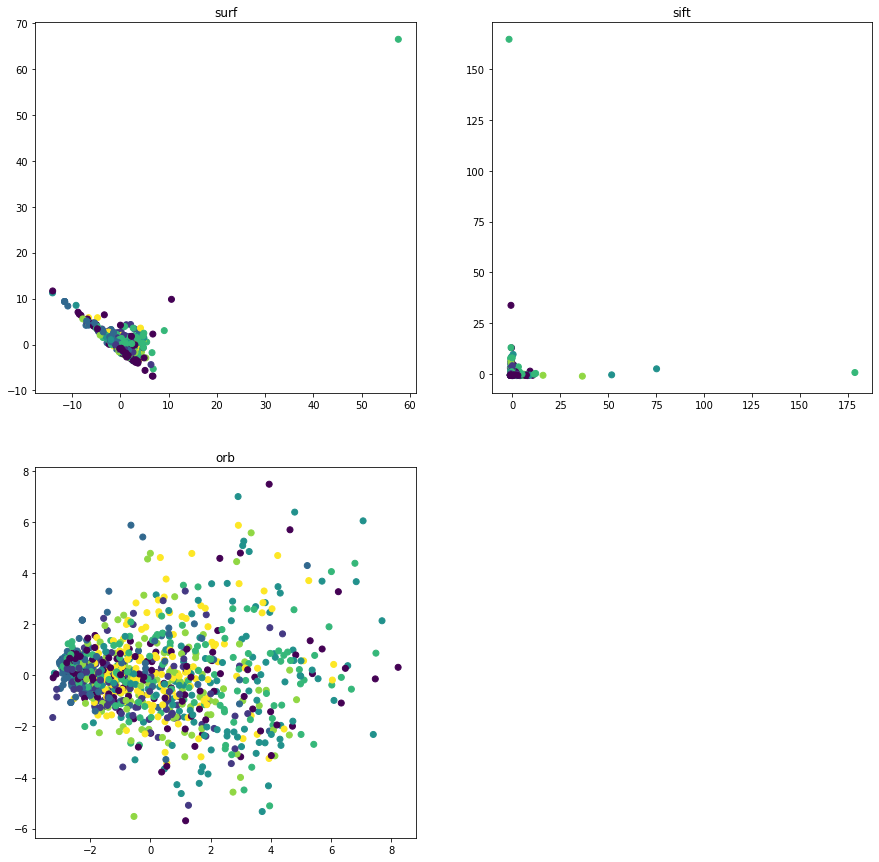

In [101]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("surf")
plt.scatter(vecteur_surf_projected[:,0], vecteur_surf_projected[:,1], c= cat_1_surf)
plt.subplot(222)
plt.title("sift")
plt.scatter(vecteur_sift_projected[:,0], vecteur_sift_projected[:,1], c= cat_1_sift)
plt.subplot(223)
plt.title("orb")
plt.scatter(vecteur_orb_projected[:,0], vecteur_orb_projected[:,1], c= cat_1_orb)

In [102]:
df_sift = pd.DataFrame(cat_1_sift)
df_surf = pd.DataFrame(cat_1_surf)
df_orb = pd.DataFrame(cat_1_orb)

In [103]:
df_sift.head(5)

,0
0,4
1,0
2,0
3,4
4,4


In [104]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_obj_sift= tsne.fit_transform(vecteur_sift)
tsne_obj_surf= tsne.fit_transform(vecteur_surf)
tsne_obj_orb= tsne.fit_transform(vecteur_orb)

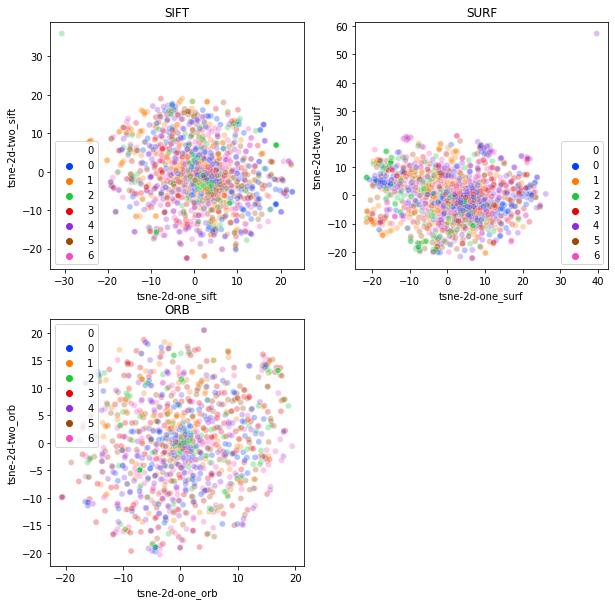

In [105]:
df_sift['tsne-2d-one_sift'] = tsne_obj_sift[:,0]
df_sift['tsne-2d-two_sift'] = tsne_obj_sift[:,1]
df_surf['tsne-2d-one_surf'] = tsne_obj_surf[:,0]
df_surf['tsne-2d-two_surf'] = tsne_obj_surf[:,1]
df_orb['tsne-2d-one_orb'] = tsne_obj_orb[:,0]
df_orb['tsne-2d-two_orb'] = tsne_obj_orb[:,1]

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("SIFT")
sns.scatterplot(
    x="tsne-2d-one_sift", y="tsne-2d-two_sift",
    data=df_sift,
    hue = 0,
    legend="full",
    palette="bright",
    alpha=0.3
)
plt.subplot(222)
plt.title("SURF")
sns.scatterplot(
    x="tsne-2d-one_surf", y="tsne-2d-two_surf",
    data=df_surf,
    hue = 0,
    legend="full",
    palette="bright",
    alpha=0.3
)
plt.subplot(223)
plt.title("ORB")
sns.scatterplot(
    x="tsne-2d-one_orb", y="tsne-2d-two_orb",
    data=df_orb,
    hue = 0,
    legend="full",
    palette="bright",
    alpha=0.3
)

#### Réduction de dimension

In [106]:
vecteur_surf.shape

(1048, 240)

In [114]:
vecteur_sift.shape

(1046, 276)

In [115]:
vecteur_orb.shape

(996, 214)

In [107]:
pca = PCA(n_components = 0.8)
pca.fit(ss.fit_transform(vecteur_surf))
pca.explained_variance_ratio_.shape
reduit_surf = pca.transform(vecteur_surf)[:,:126]

In [108]:
pca.fit(ss.fit_transform(vecteur_sift))
pca.explained_variance_ratio_.shape
reduit_sift = pca.transform(vecteur_sift)[:,:126]

In [109]:
pca.fit(ss.fit_transform(vecteur_orb))
pca.explained_variance_ratio_.shape
reduit_orb = pca.transform(vecteur_orb)[:,:113]

#### Kmeans

In [126]:
kmeans_sift_reduit = KMeans(n_clusters=7, random_state=0).fit(reduit_sift).predict(reduit_sift)
kmeans_surf_reduit = KMeans(n_clusters=7, random_state=0).fit(reduit_surf).predict(reduit_surf)
kmeans_orb_reduit = KMeans(n_clusters=7, random_state=0).fit(reduit_orb).predict(reduit_orb)

#### score ARI échantillon réduit

In [127]:
print("le score ARI pour sift reduit : " ,metrics.adjusted_rand_score(cat_1_sift,kmeans_sift_reduit))
print("le score ARI pour surf reduit : " ,metrics.adjusted_rand_score(cat_1_surf,kmeans_surf_reduit))
print("le score ARI pour orb reduit : " ,metrics.adjusted_rand_score(cat_1_orb,kmeans_orb_reduit))

le score ARI pour sift reduit :  0.026641966897194325
le score ARI pour surf reduit :  0.016875752655032106
le score ARI pour orb reduit :  0.022860279235434114


In [128]:
ari_sift_reduit = metrics.adjusted_rand_score(cat_1_sift,kmeans_sift_reduit)
ari_surf_reduit = metrics.adjusted_rand_score(cat_1_surf,kmeans_surf_reduit)
ari_orb_reduit = metrics.adjusted_rand_score(cat_1_orb,kmeans_orb_reduit)

In [129]:
resultats_bag_réduit = [ari_sift_reduit,ari_surf_reduit,ari_orb_reduit]
resultats_bag = [ari_sift,ari_surf,ari_orb]

In [130]:
index = ['SIFT','SURF','ORB']

Text(0.5, 1.0, 'Score ARI')

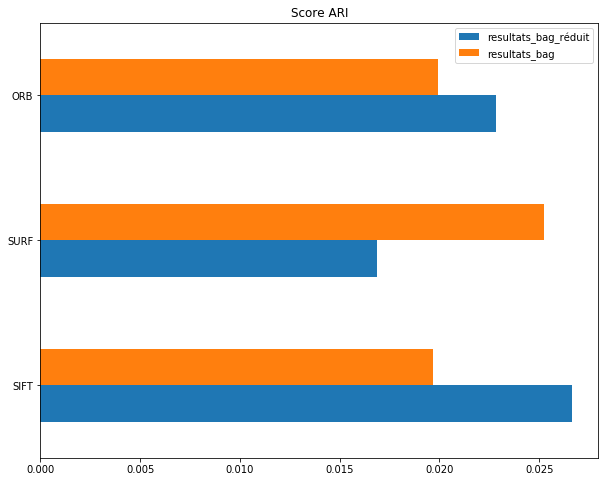

In [131]:
ari_final = pd.DataFrame({'resultats_bag_réduit': resultats_bag_réduit,
                   'resultats_bag': resultats_bag}, index=index)
ax = ari_final.plot.barh(figsize=(10,8))
plt.title('Score ARI')

#### Transfer learning 

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
model = VGG16(weights='imagenet', include_top=False)
#model.summary()
vgg16_feature_list = []
for i in df['image']:
    img_path = i
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())



In [139]:
vgg16_feature_list_np = np.array(vgg16_feature_list)
kmeans_vgg16 = KMeans(n_clusters=7, random_state=0).fit(vgg16_feature_list_np).predict(vgg16_feature_list_np)

In [140]:
vgg16_feature_list_np.shape

(1050, 25088)

In [141]:
print(kmeans_vgg16[0:20])

[4 4 4 4 4 0 6 0 0 0 6 0 0 0 5 0 5 5 0 5]


In [142]:
pca = decomposition.PCA(n_components=2)
pca.fit(vgg16_feature_list_np)
X_projected = pca.transform(vgg16_feature_list_np)

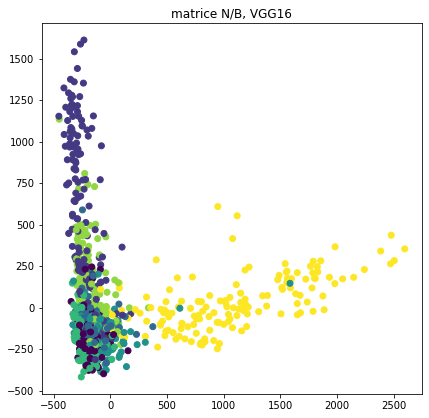

In [143]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("matrice N/B, VGG16")
plt.scatter(X_projected[:,0], X_projected[:,1], c= cat_1)

In [144]:
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(vgg16_feature_list_np)

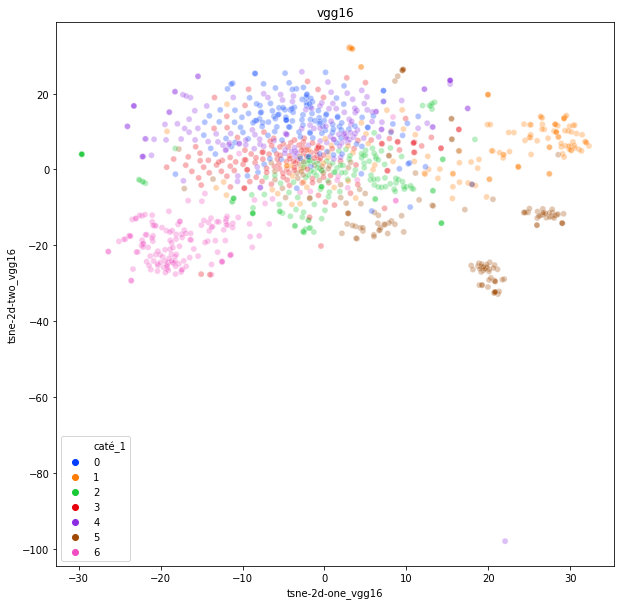

In [145]:
df['tsne-2d-one_vgg16'] = tsne_obj[:,0]
df['tsne-2d-two_vgg16'] = tsne_obj[:,1]

plt.figure(figsize=(10,10))
plt.title("vgg16")
sns.scatterplot(
    x="tsne-2d-one_vgg16", y="tsne-2d-two_vgg16",
    data=df,
    hue = "caté_1",
    legend="full",
    palette="bright",
    alpha=0.3
)

In [146]:
print("le score ARI pour vgg16 : " ,metrics.adjusted_rand_score(cat_1,kmeans_vgg16))

le score ARI pour vgg16 :  0.2792209429986846


In [147]:
ari_vgg16 = metrics.adjusted_rand_score(cat_1,kmeans_vgg16)

#### Vgg16 réduit

In [148]:
pca = decomposition.PCA(n_components=0.8)
pca.fit(ss.fit_transform(vgg16_feature_list_np))
pca.explained_variance_ratio_.shape
df_vgg16_reduit = pca.transform(vgg16_feature_list_np)[:,:477]

In [149]:
kmeans_vgg16_reduit = KMeans(n_clusters=7, random_state=0).fit(df_vgg16_reduit).predict(df_vgg16_reduit)

In [150]:
print("le score ARI pour vgg16 reduit : " ,metrics.adjusted_rand_score(cat_1,kmeans_vgg16_reduit))

le score ARI pour vgg16 reduit :  0.23385334469211125


In [151]:
ari_vgg16_reduit = metrics.adjusted_rand_score(cat_1,kmeans_vgg16_reduit)

In [152]:
resultats_réduit = [ari_vgg16_reduit,ari_sans_filtre_reduit,ari_gauss_reduit,ari_moy_reduit,
                    ari_med_reduit,ari_surf_reduit,ari_sift_reduit,ari_orb_reduit]
resultats = [ari_vgg16,sans_filtre_ari,gauss_ari,moy_ari,med_ari,ari_surf,ari_sift,ari_orb]

In [153]:
index = ['vgg16']

Text(0.5, 1.0, 'Score ARI')

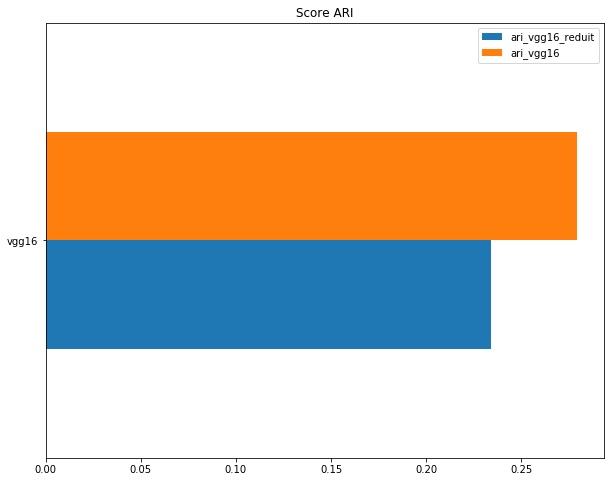

In [154]:
ari_final = pd.DataFrame({'ari_vgg16_reduit': ari_vgg16_reduit,
                   'ari_vgg16': ari_vgg16}, index=index)
ax = ari_final.plot.barh(figsize=(10,8))
plt.title('Score ARI')

#### Résumé de tous les scores ARI

In [348]:
resultats_réduit = [ari_vgg16_reduit,ari_sans_filtre_reduit,ari_gauss_reduit,ari_moy_reduit,
                    ari_med_reduit,ari_surf_reduit,ari_sift_reduit,ari_orb_reduit]
resultats = [ari_vgg16,sans_filtre_ari,gauss_ari,moy_ari,med_ari,ari_surf,ari_sift,ari_orb]

In [353]:
index = ['vgg16','sans_filtre','gauss','moy','med','surf','sift','orb']

Text(0.5, 1.0, 'Score ARI')

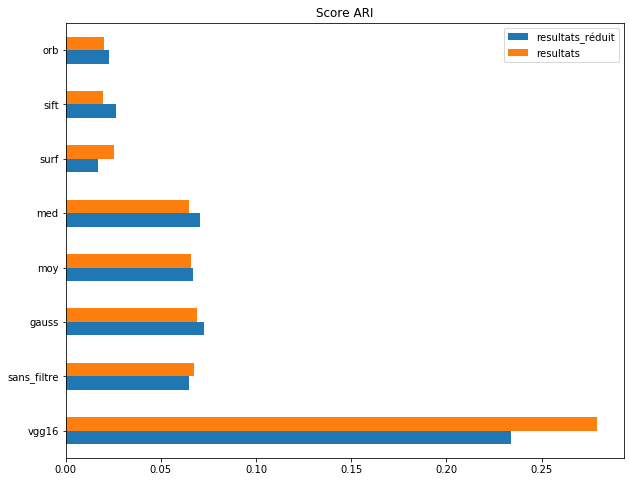

In [354]:
ari_final = pd.DataFrame({'resultats_réduit': resultats_réduit,
                   'resultats': resultats}, index=index)
ax = ari_final.plot.barh(figsize=(10,8))
plt.title('Score ARI')

# Traitement du texte 

In [174]:
data = pd.read_csv('C:/Users/eliet/Downloads/Dataset+projet+prétraitement+textes+images/Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [175]:
data['description'].sample(5)

615    Specifications of Boreal Plastic rectangular h...
283    Specifications of Yves Bertelin YBSCR557 Analo...
427    Key Features of Smartpro 19.5v,3.9a Replacemen...
75     Specifications of Vitamins Embroidered Baby Gi...
739    Buyer's Beach BB349 (Brown) Price: Rs. 449 Sty...
Name: description, dtype: object

## Preprocess

In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eliet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [177]:
# Import packages and modules
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a dataframe
#test = pd.DataFrame(data, columns=['description'])

In [178]:
def preprocess_text(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise permet de mettre les mots en minuscule
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
               
    return keywords

## bag of word

In [179]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=preprocess_text,min_df=15) ## regarder les paramètres max min
bag_of_word = vectorizer.fit_transform(data['description'])
bag_of_word = pd.DataFrame.sparse.from_spmatrix(bag_of_word)
#col_map = {v:k for k, v in vectoriser.vocabulary_.items()}
# Rename each column using the mapping
#for col in bag_of_word.columns:
#    bag_of_word.rename(columns={col: col_map[col]}, inplace=True)

In [180]:
bag_of_word.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398
0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1,0
2,0,0,1,2,0,0,0,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
3,0,3,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0
4,4,4,0,2,0,0,0,0,0,0,0,4,0,0,0,0,0,...,1,0,3,0,3,0,0,0,0,0,0,0,0,0,0,1,0


In [181]:
bag_of_word.shape

(1050, 399)

#### Kmeans

In [182]:
from sklearn.cluster import KMeans
bag_of_word_kmeans = KMeans(n_clusters=7, random_state=0).fit(bag_of_word).predict(bag_of_word)

In [183]:
from sklearn import metrics
print("le score ARI pour baf of word : " ,metrics.adjusted_rand_score(cat_1,bag_of_word_kmeans))

le score ARI pour baf of word :  0.06636986830093751


In [184]:
ari_bag_of_word = metrics.adjusted_rand_score(cat_1,bag_of_word_kmeans)

#### Visualisation

In [185]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(bag_of_word)
X_bag_of_word = pca.transform(bag_of_word)

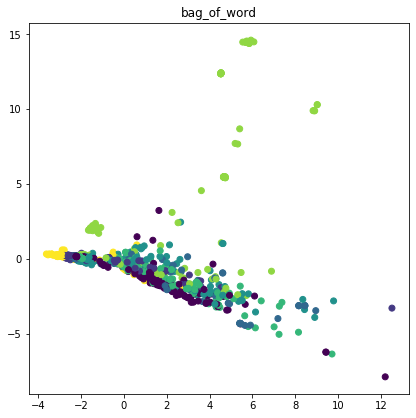

In [186]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("bag_of_word")
plt.scatter(X_bag_of_word[:,0], X_bag_of_word[:,1],c=cat_1)

In [237]:
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(bag_of_word)

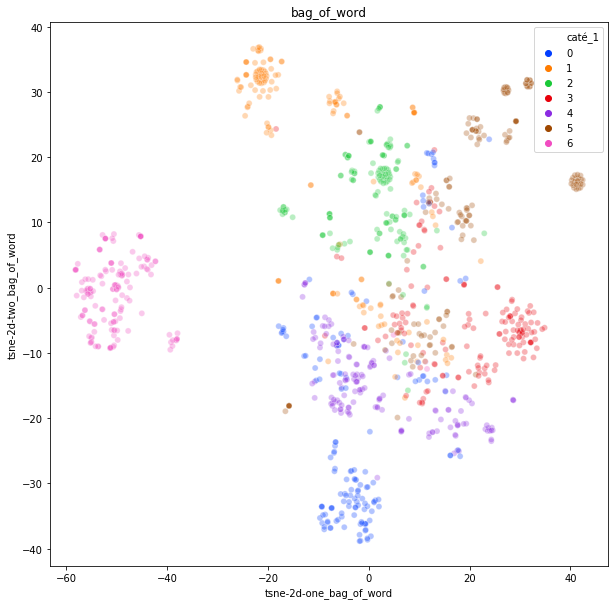

In [238]:
df['tsne-2d-one_bag_of_word'] = tsne_obj[:,0]
df['tsne-2d-two_bag_of_word'] = tsne_obj[:,1]

plt.figure(figsize=(10,10))
plt.title("bag_of_word")
sns.scatterplot(
    x="tsne-2d-one_bag_of_word", y="tsne-2d-two_bag_of_word",
    data=df,
    hue = "caté_1",
    legend="full",
    palette="bright",
    alpha=0.3
)

#### Réduction de dimension

In [187]:
pca = decomposition.PCA(n_components=0.8)
pca.fit(ss.fit_transform(bag_of_word))
pca.explained_variance_ratio_.shape
bag_of_word_reduit = pca.transform(bag_of_word)[:,:96]

In [188]:
bag_of_word_reduit_kmeans = KMeans(n_clusters=7, random_state=0).fit(bag_of_word_reduit).predict(bag_of_word_reduit)

In [189]:
print("le score ARI pour baf of word : " ,metrics.adjusted_rand_score(cat_1,bag_of_word_reduit_kmeans))

le score ARI pour baf of word :  0.16063304120139718


In [190]:
ari_bag_of_word_reduit = metrics.adjusted_rand_score(cat_1,bag_of_word_reduit_kmeans)

## TFIDF

In [191]:
# Create an instance of TfidfVectorizer
vectoriser = TfidfVectorizer(analyzer=preprocess_text,min_df=0.03,max_df=0.5) ## regarder paramètres
# Fit to the data and transform to feature matrix
tfi = vectoriser.fit_transform(data['description'])
# Convert sparse matrix to dataframe
tfi = pd.DataFrame.sparse.from_spmatrix(tfi)


In [ ]:
# Save mapping on which index refers to which words
#col_map = {v:k for k, v in vectoriser.vocabulary_.items()}
# Rename each column using the mapping
#for col in test.columns:
#    test.rename(columns={col: col_map[col]}, inplace=True)
#test

In [192]:
tfi.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173
0,0.000000,0.000000,0.000000,0.097922,0.0,0.0,0.401820,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.062169,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.368411,0.066265,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.092650,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.124976,0.133764,0.000000,0.136201
2,0.000000,0.000000,0.092114,0.166937,0.0,0.0,0.000000,0.093868,0.070240,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.285367,...,0.0,0.0,0.0,0.052993,0.0,0.069841,0.000000,0.228721,0.0,0.07127,0.0,0.074698,0.000000,0.071482,0.076509,0.080668,0.000000
3,0.000000,0.136861,0.000000,0.000000,0.0,0.0,0.191618,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.049412,0.0,0.000000,0.000000,0.071088,0.0,0.00000,0.0,0.000000,0.000000,0.199955,0.000000,0.000000,0.072638
4,0.275326,0.147125,0.000000,0.125497,0.0,0.0,0.205989,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.039838,0.0,0.052504,0.061661,0.000000,0.0,0.00000,0.0,0.056155,0.199613,0.161213,0.000000,0.000000,0.058564


In [193]:
tfi.shape

(1050, 174)

In [194]:
pca = decomposition.PCA(n_components=2)
pca.fit(tfi)
X_tfi = pca.transform(tfi)

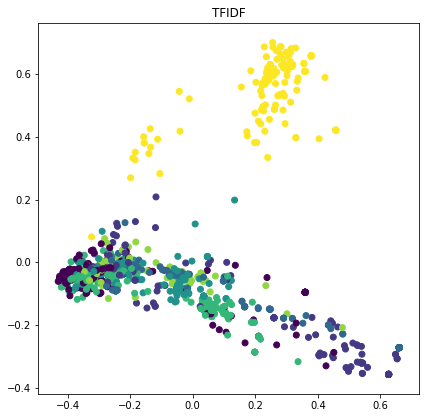

In [195]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("TFIDF")
plt.scatter(X_tfi[:,0], X_tfi[:,1],c=cat_1)

In [239]:
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(tfi)

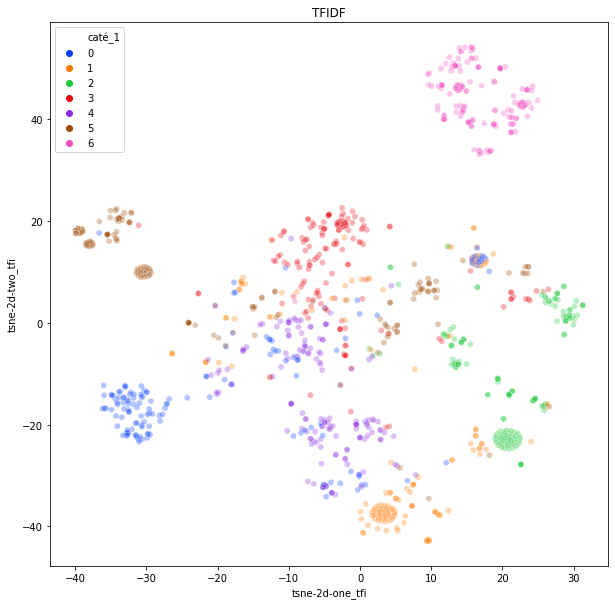

In [240]:
df['tsne-2d-one_tfi'] = tsne_obj[:,0]
df['tsne-2d-two_tfi'] = tsne_obj[:,1]

plt.figure(figsize=(10,10))
plt.title("TFIDF")
sns.scatterplot(
    x="tsne-2d-one_tfi", y="tsne-2d-two_tfi",
    data=df,
    hue = "caté_1",
    legend="full",
    palette="bright",
    alpha=0.3
)

In [196]:
from sklearn.cluster import KMeans
tfi_kmeans = KMeans(n_clusters=7, random_state=0).fit(tfi).predict(tfi)

In [197]:
print("le score ARI pour baf of word : " ,metrics.adjusted_rand_score(cat_1,tfi_kmeans))

le score ARI pour baf of word :  0.29990651712688104


In [198]:
ari_tfi = metrics.adjusted_rand_score(cat_1,tfi_kmeans)

#### Reduit TFIDF

In [199]:
pca = decomposition.PCA(n_components=0.8)
pca.fit(ss.fit_transform(tfi))
pca.explained_variance_ratio_.shape
tfi_reduit = pca.transform(tfi)[:,:73]

#### Kmeans

In [200]:
tfi_reduit_kmeans = KMeans(n_clusters=7, random_state=0).fit(tfi_reduit).predict(tfi_reduit)

In [201]:
print("le score ARI pour baf of word : " ,metrics.adjusted_rand_score(cat_1,tfi_reduit_kmeans))

le score ARI pour baf of word :  0.2920155485481903


In [202]:
ari_tfi_reduit = metrics.adjusted_rand_score(cat_1,tfi_reduit_kmeans)

#### Visualisation des deux modèles pour le traitement de texte (ARI)

In [203]:
resultats_ecrit_réduit = [ari_bag_of_word_reduit,ari_tfi_reduit]
resultats_ecrit = [ari_bag_of_word,ari_tfi]

In [204]:
index = ['bag of word','tfidf']

Text(0.5, 1.0, 'Score ARI')

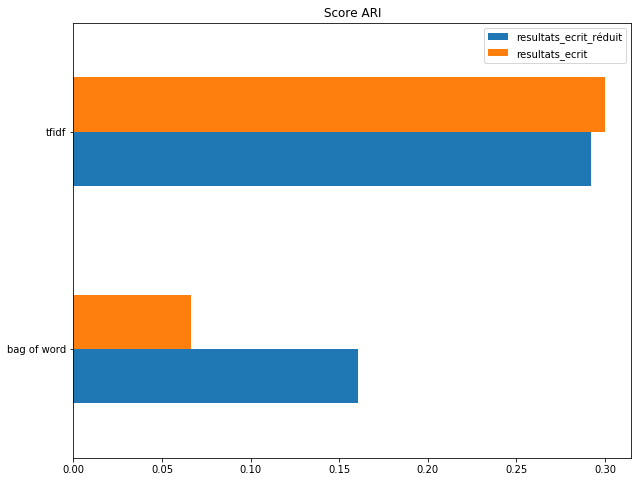

In [205]:
ari_final = pd.DataFrame({'resultats_ecrit_réduit': resultats_ecrit_réduit,
                   'resultats_ecrit': resultats_ecrit}, index=index)
ax = ari_final.plot.barh(figsize=(10,8))
plt.title('Score ARI')

### Comparasion entre les scores ARI d'image et les scores ARI de texte

In [207]:
total_reduit = resultats_ecrit_réduit + resultats_réduit
total = resultats_ecrit + resultats

In [208]:
index = ['bag of word','tfidf','vgg16','sans_filtre','gauss','moy','med','surf','sift','orb']

Text(0.5, 1.0, 'Score ARI comparaison écrit et image')

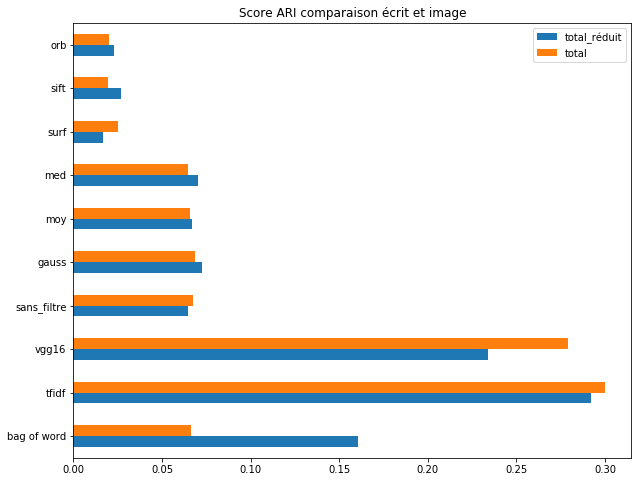

In [209]:
ari_final = pd.DataFrame({'total_réduit': total_reduit,
                   'total': total}, index=index)
ax = ari_final.plot.barh(figsize=(10,8))
plt.title('Score ARI comparaison écrit et image')

### Rassemblement des deux meilleurs modèles (vgg16 et tfidf)

In [253]:
tfi_reduit = pd.DataFrame(tfi_reduit)

In [254]:
vgg16_reduit = pd.DataFrame(df_vgg16_reduit)

In [255]:
rassemblement = pd.concat([vgg16_reduit,tfi_reduit],axis=1)

In [256]:
rassemblement.shape

(1050, 550)

#### Visualisation

In [257]:
pca = decomposition.PCA(n_components=2)
pca.fit(rassemblement)
X_rassemblement = pca.transform(rassemblement)

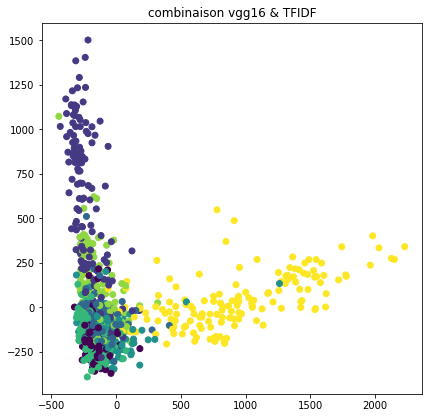

In [258]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("combinaison vgg16 & TFIDF")
plt.scatter(X_rassemblement[:,0], X_rassemblement[:,1],c=cat_1)

In [259]:
tsne = TSNE(n_components=2, random_state=0)
tsne_obj_rassemblement= tsne.fit_transform(rassemblement)

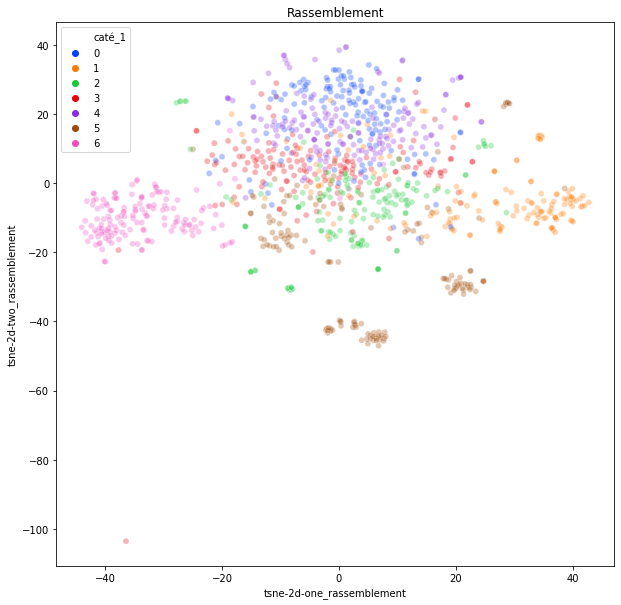

In [260]:
df['tsne-2d-one_rassemblement'] = tsne_obj_rassemblement[:,0]
df['tsne-2d-two_rassemblement'] = tsne_obj_rassemblement[:,1]

plt.figure(figsize=(10,10))
plt.title("Rassemblement")
sns.scatterplot(
    x="tsne-2d-one_rassemblement", y="tsne-2d-two_rassemblement",
    data=df,
    hue = "caté_1",
    legend="full",
    palette="bright",
    alpha=0.3
)

#### Kmeans

In [216]:
rassemblement_kmeans = KMeans(n_clusters=7, random_state=0).fit(rassemblement).predict(rassemblement)

#### ARI

In [217]:
print("le score ARI pour les deux combinés : " ,metrics.adjusted_rand_score(cat_1,rassemblement_kmeans))

le score ARI pour les deux combinés :  0.23385334469211125


In [228]:
rassemblement = metrics.adjusted_rand_score(cat_1,rassemblement_kmeans)

#### Réduction de dimension

In [218]:
pca = decomposition.PCA(n_components=0.8)
pca.fit(ss.fit_transform(rassemblement))
pca.explained_variance_ratio_.shape
rassemblement_reduit = pca.transform(rassemblement)[:,:298]

#### Kmeans

In [219]:
rassemblement_reduit_kmeans = KMeans(n_clusters=7, random_state=0).fit(rassemblement_reduit).predict(rassemblement_reduit)

#### ARI

In [220]:
print("le score ARI pour les deux combinés réduit : " ,metrics.adjusted_rand_score(cat_1,rassemblement_reduit_kmeans))

le score ARI pour les deux combinés réduit :  0.12342395691856134


In [227]:
rassemblement_reduit = metrics.adjusted_rand_score(cat_1,rassemblement_reduit_kmeans)

#### Conclusion

In [230]:
rassemblement_reduit

0.12342395691856134

In [231]:
rassemblement

0.23385334469211125

In [234]:
total_reduit = resultats_ecrit_réduit + resultats_réduit + [rassemblement_reduit]
total = resultats_ecrit + resultats + [rassemblement]

In [235]:
index = ['bag of word','tfidf','vgg16','sans_filtre','gauss','moy','med','surf','sift','orb','rassemblement']

Text(0.5, 1.0, 'Score ARI comparaison écrit et image')

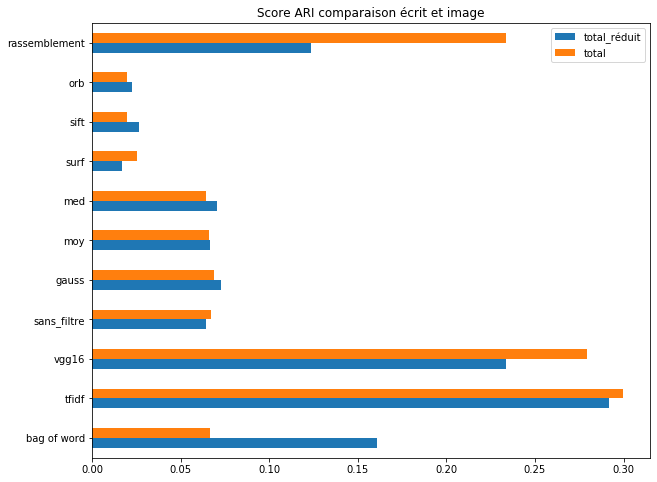

In [236]:
ari_final = pd.DataFrame({'total_réduit': total_reduit,
                   'total': total}, index=index)
ax = ari_final.plot.barh(figsize=(10,8))
plt.title('Score ARI comparaison écrit et image')